# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("This record is not completed, moving onto the next city...")

City Name: hambantota, City ID: 1244926
City Name: shimoda, City ID: 1852357
City Name: cape town, City ID: 3369157
City Name: bathsheba, City ID: 3374083
City Name: katsuura, City ID: 2112309
City Name: havelock, City ID: 4470244
City Name: ushuaia, City ID: 3833367
City Name: tessalit, City ID: 2449893
City Name: neftcala, City ID: 147425
City Name: saint-philippe, City ID: 935215
This record is not completed, moving onto the next city...
City Name: neiafu, City ID: 4032420
City Name: inverell, City ID: 2162662
City Name: tura, City ID: 1254046
City Name: albany, City ID: 5106841
City Name: qaanaaq, City ID: 3831208
City Name: khani, City ID: 610864
This record is not completed, moving onto the next city...
City Name: kitgum, City ID: 230893
City Name: mataura, City ID: 6201424
City Name: kieta, City ID: 2094027
City Name: puerto ayora, City ID: 3652764
City Name: samarai, City ID: 2132606
City Name: pinar del rio, City ID: 3544091
City Name: marolambo, City ID: 1060007
City Name: ar

City Name: avarua, City ID: 4035715
City Name: kenai, City ID: 5866063
City Name: kodiak, City ID: 5866583
City Name: dickinson, City ID: 4686163
City Name: plettenberg bay, City ID: 964712
City Name: darasun, City ID: 2025121
City Name: scheemda, City ID: 2755249
City Name: dhidhdhoo, City ID: 1337612
City Name: takoradi, City ID: 2294915
City Name: vostok, City ID: 2013279
City Name: mandalgovi, City ID: 2030065
City Name: port-gentil, City ID: 2396518
City Name: havoysund, City ID: 779622
City Name: aklavik, City ID: 5882953
City Name: vardo, City ID: 777019
City Name: okhotsk, City ID: 2122605
City Name: bredasdorp, City ID: 1015776
City Name: jawhar, City ID: 56335
City Name: port hedland, City ID: 2063042
City Name: slave lake, City ID: 6149374
City Name: pasighat, City ID: 1260206
City Name: tuatapere, City ID: 2180815
City Name: kabinda, City ID: 215527
City Name: hervey bay, City ID: 2146219
City Name: rassvet, City ID: 502738
This record is not completed, moving onto the next

City Name: kununurra, City ID: 2068110
City Name: oyama, City ID: 1853483
City Name: san antonio, City ID: 4726206
City Name: constitucion, City ID: 3893726
City Name: maniitsoq, City ID: 3421982
City Name: camabatela, City ID: 2242885
City Name: gweta, City ID: 933734
City Name: faranah, City ID: 2421273
City Name: price, City ID: 5545269
City Name: qianguo, City ID: 2035399
City Name: kruisfontein, City ID: 986717
City Name: kaiyuan, City ID: 1804850
City Name: roald, City ID: 3141667
City Name: san ignacio, City ID: 3581194
City Name: tazmalt, City ID: 2477537
City Name: port hardy, City ID: 6111862
City Name: tarko-sale, City ID: 1490085
City Name: amapa, City ID: 3407762
City Name: kushmurun, City ID: 1519924
City Name: kirakira, City ID: 2178753
City Name: abha, City ID: 110690
This record is not completed, moving onto the next city...
This record is not completed, moving onto the next city...
City Name: grindavik, City ID: 3416888
City Name: la primavera, City ID: 3678000
This r

City Name: grand valley, City ID: 5964707
City Name: gunjur, City ID: 2413419
City Name: sergeyevka, City ID: 1519385
City Name: sabang, City ID: 1214026
City Name: punta de piedra, City ID: 3629604


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1244926,Hambantota,LK,6.1241,81.1185,80.94,94,20,4.61
1,1852357,Shimoda,JP,34.6667,138.9500,53.10,84,62,14.94
2,3369157,Cape Town,ZA,-33.9258,18.4232,65.48,77,0,11.50
3,3374083,Bathsheba,BB,13.2167,-59.5167,79.05,88,40,18.41
4,2112309,Katsuura,JP,35.1333,140.3000,52.68,93,100,4.41


In [5]:
# Export to .csv file
cities_df.to_csv("output_data/city_weather.csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.


In [6]:
#check if there are any cities with Humidity >100% 
cities_df["Humidity"].describe()

count    576.000000
mean      74.671875
std       18.887722
min       12.000000
25%       65.000000
50%       78.000000
75%       90.000000
max      100.000000
Name: Humidity, dtype: float64

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_101 = cities_df[(cities_df["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_101, inplace=False)
clean_city_data

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1244926,Hambantota,LK,6.1241,81.1185,80.94,94,20,4.61
1,1852357,Shimoda,JP,34.6667,138.9500,53.10,84,62,14.94
2,3369157,Cape Town,ZA,-33.9258,18.4232,65.48,77,0,11.50
3,3374083,Bathsheba,BB,13.2167,-59.5167,79.05,88,40,18.41
4,2112309,Katsuura,JP,35.1333,140.3000,52.68,93,100,4.41
...,...,...,...,...,...,...,...,...,...
571,5964707,Grand Valley,CA,43.9001,-80.3164,18.81,93,100,6.58
572,2413419,Gunjur,GM,13.2019,-16.7339,72.88,33,4,11.83
573,1519385,Sergeevka,KZ,53.8800,67.4158,-10.73,98,46,6.46
574,1214026,Sabang,ID,5.8933,95.3214,80.74,78,100,14.97


In [9]:
# Export the filtered city data into a csv
clean_city_data.to_csv("./output_data/clean_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

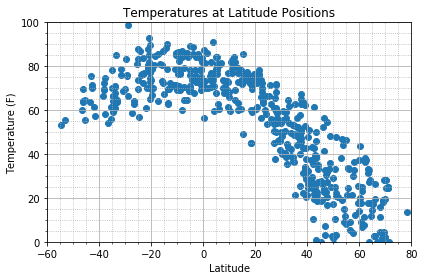

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_temp.png")

## Latitude vs. Humidity Plot

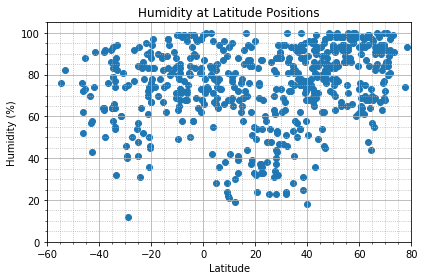

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_humid.png")

## Latitude vs. Cloudiness Plot

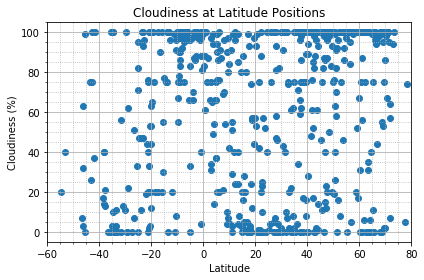

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_clouds.png")

## Latitude vs. Wind Speed Plot

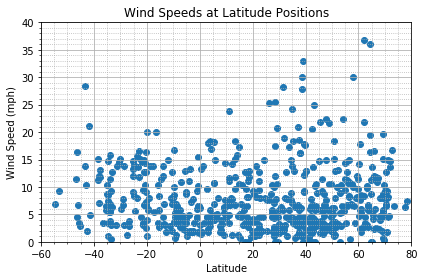

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/lat_wind.png")

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

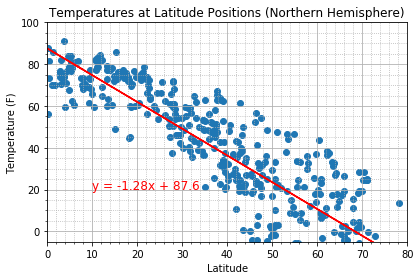

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

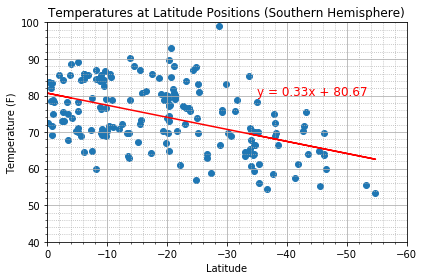

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

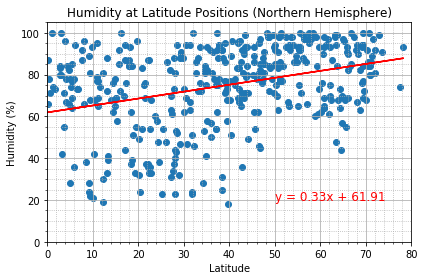

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

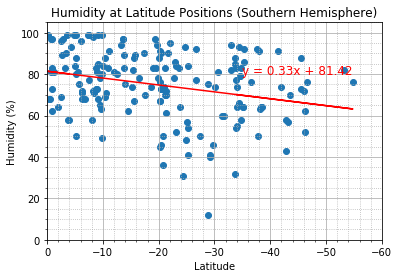

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/sh_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

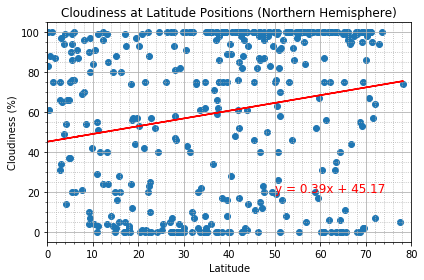

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

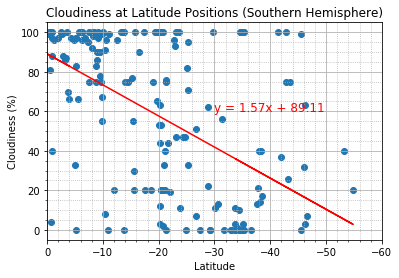

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/sh_lat_clouds_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

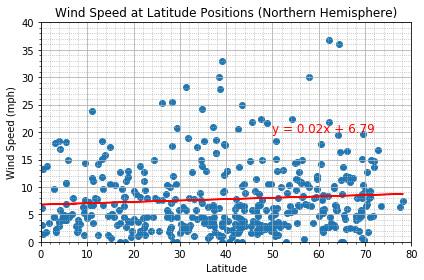

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("output_data/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

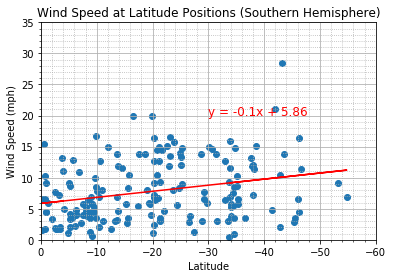

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("output_data/sh_lat_wind_regression.png")